In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle5 as pickle
import glob
from collections import defaultdict

In [30]:
def plot(df, title, display_legend=False):
    
    image_names = np.unique(df['image'] )
    
    # compute the average cell density
    densities=defaultdict(list)
    
    for image in image_names:
        image_data = df[df['image']==image].to_numpy()[:,[1,2]]
        for depth, value  in zip(image_data[:,0],image_data[:,1]):
            densities[depth].append(value)
            
    average={}
    median={}
    for key, value in densities.items():
        average[key] = np.average(value)
        median[key] = np.median(value)
    
    plt.figure(figsize=(10,10))
    for image in image_names:
        image_data = df[df['image']==image].to_numpy()[:,[0,1,2]]
        plt.plot(image_data[:,2], image_data[:,1])
        
    plt.plot(list(average.values()), list(average.keys()), linewidth=5, c='y', label='average values')
    plt.plot(list(median.values()),list(median.keys()), linewidth=5, c='black', label='median values')
    plt.title(f'{title} Cell density as a function of SSCX region percentage of depth.')
    plt.gca().set_ylabel("SSCX region percentage of depth")
    plt.gca().set_xlabel("Cell density cells/mm3")
    plt.gca().invert_yaxis()
    
    if diaplay_legend:
        lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
        for i in range(1):
            lgnd.legendHandles[i]._sizes = [5]
            lgnd.legendHandles[i]._alpha = 1 

In [31]:
df = pd.DataFrame()
frames = []

file_list = glob.glob('/tmp/output_path_batch/Test/*.csv')
for file in file_list:
    frames.append(pd.read_csv(file, index_col=0))
df = pd.concat(frames)

/tmp/ipykernel_8880/242136954.py:34: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[i]._sizes = [5]
/tmp/ipykernel_8880/242136954.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[i]._alpha = 1


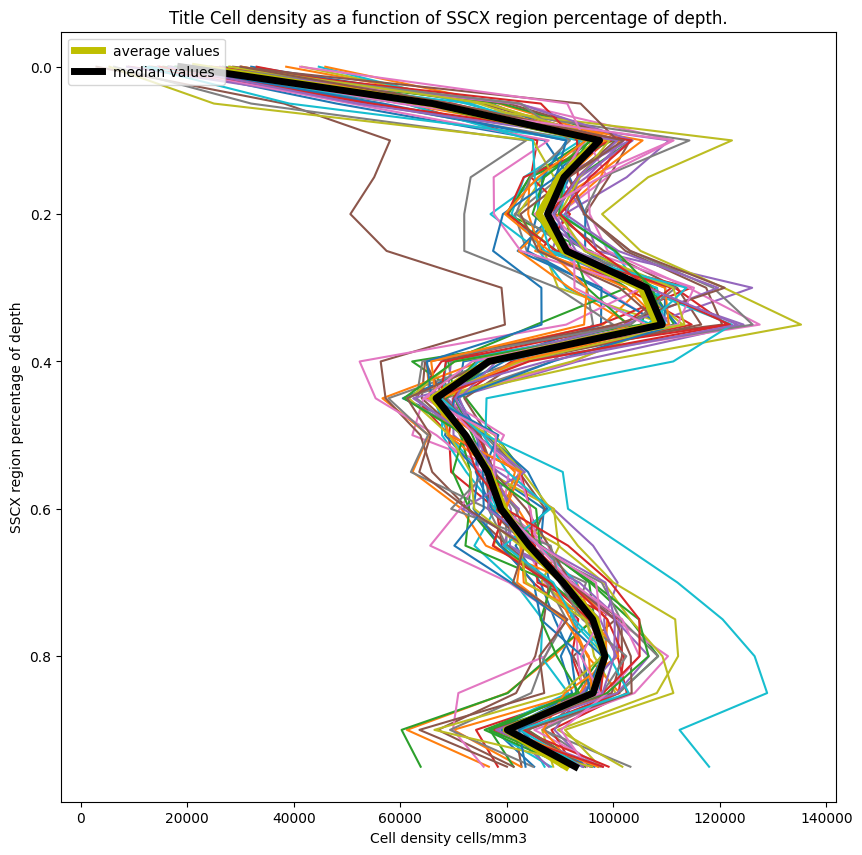

In [32]:
plot(df, 'Title', display_legend=True)

In [156]:
def plot_std(df, title, display_legend=False):
    
    image_names = np.unique(df['image'] )
    
    # compute the average cell density
    densities=defaultdict(list)
    
    for image in image_names:
        image_data = df[df['image']==image].to_numpy()[:,[1,2]]
        for depth, value  in zip(image_data[:,0],image_data[:,1]):
            densities[depth].append(value)
            
    average={}
    median={}
    for key, value in densities.items():
        average[key] = np.average(value)
        median[key] = np.median(value)

    x = []
    y = []
    for image in image_names:
        image_data = df[df['image']==image].to_numpy()[:,[0,1,2]]
        #plt.plot(image_data[:,2], image_data[:,1])
        x.extend(image_data[:,2])
        y.extend(image_data[:,1])
    x = np.array(x)
    y = np.array(y)


    #plt.plot(list(average.values()), list(average.keys()), linewidth=5, c='y', label='average values')
    #plt.plot(list(median.values()),list(median.keys()), linewidth=5, c='black', label='median values')
    plt.title(f'{title} Cell density as a function of SSCX region percentage of depth.')

    plt.gca().set_ylabel("SSCX region percentage of depth")
    plt.gca().set_xlabel("Cell density cells/mm3")
    plt.gca().invert_yaxis()

    error = np.random.normal(0.1, 0.02, size=y.shape)
    y += np.random.normal(0, 0.1, size=y.shape)

    plt.plot(x, y)
    #plt.fill_between(x, y-error, y+error)
    
    
    if diaplay_legend:
        lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
        for i in range(1):
            lgnd.legendHandles[i]._sizes = [5]
            lgnd.legendHandles[i]._alpha = 1 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x.shape: (940,)
y.shape: (940,)


/tmp/ipykernel_8880/3852884505.py:50: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[i]._sizes = [5]


IndexError: list index out of range

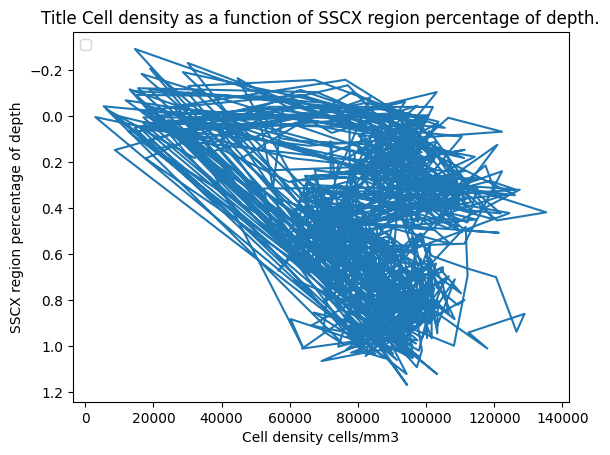

In [157]:
plot_std(df, 'Title', display_legend=True)

In [49]:
t.shape

(500,)

In [61]:
densities_all

NameError: name 'densities_all' is not defined

In [106]:
import numpy as np
import matplotlib.pyplot as plt 

M_new_vec = np.array(M_new_vec)
Sigma_new_vec = np.array(Sigma_new_vec)

lower_bound = M_new_vec - Sigma_new_vec
upper_bound = M_new_vec + Sigma_new_vec

plt.fill_between(x_axis, lower_bound, upper_bound, alpha=.3)

NameError: name 'M_new_vec' is not defined

In [86]:
x

array([5, 0, 3, 3, 7, 9, 3, 5, 2, 4])

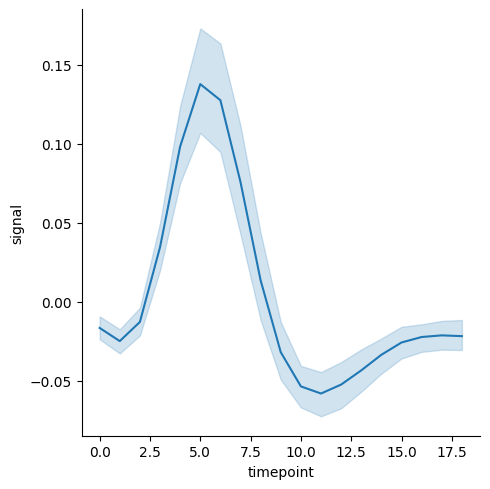

In [107]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

In [108]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [109]:
df

,image,depth_percentage,densities
0,SLD_0000481.vsi-20x_01,0.00,32015.396035
1,SLD_0000481.vsi-20x_01,0.05,77062.943520
2,SLD_0000481.vsi-20x_01,0.10,94847.702393
3,SLD_0000481.vsi-20x_01,0.15,88783.204387
4,SLD_0000481.vsi-20x_01,0.20,87285.093882
...,...,...,...
15,SLD_0000535.vsi-20x_01,0.75,93395.661252
16,SLD_0000535.vsi-20x_01,0.80,92188.288661
17,SLD_0000535.vsi-20x_01,0.85,94749.410550
18,SLD_0000535.vsi-20x_01,0.90,74217.026760


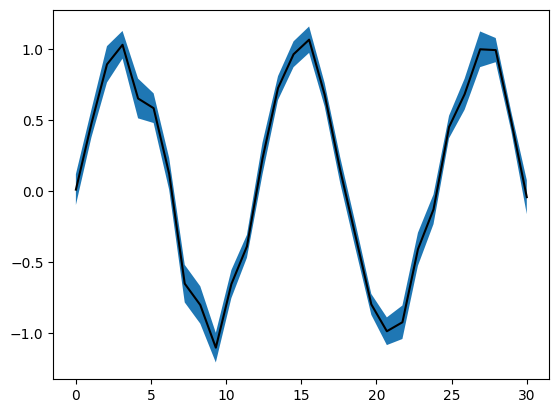

In [122]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 30, 30)
y = np.sin(x/6*np.pi)
error = np.random.normal(0.1, 0.02, size=y.shape)
y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error)
plt.show()

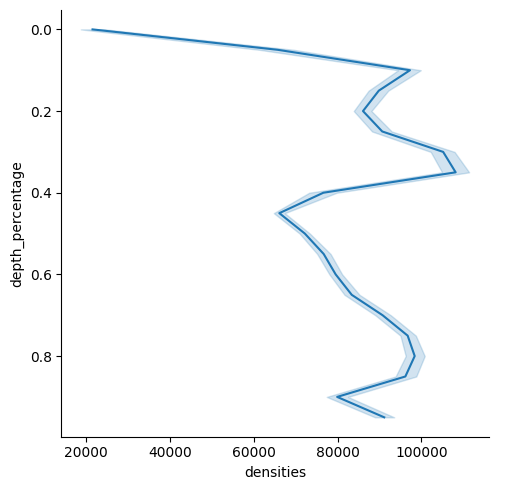

In [281]:
'''
More complex datasets will have multiple measurements for the same value of the x variable.
The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting 
the mean and the 95% confidence interval around the mean:
'''

g = sns.relplot(data=df, y="depth_percentage", x="densities", kind="line", orient="y")
g.add_legend()#legend_data=None, title='title', label_order=None, adjust_subtitles=False)

for ax in g.axes[0]:
    ax.invert_yaxis()

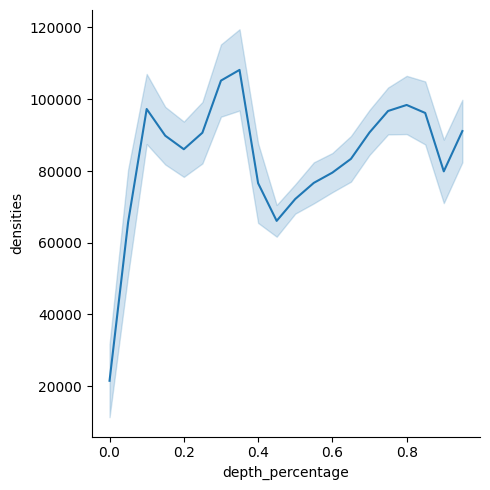

In [257]:
sns.relplot(data=df, x="depth_percentage", y="densities", kind="line", errorbar="sd")
'''
Another good option, especially with larger data, is to represent the spread of the distribution 
at each timepoint by plotting the standard deviation instead of a confidence interval:
'''

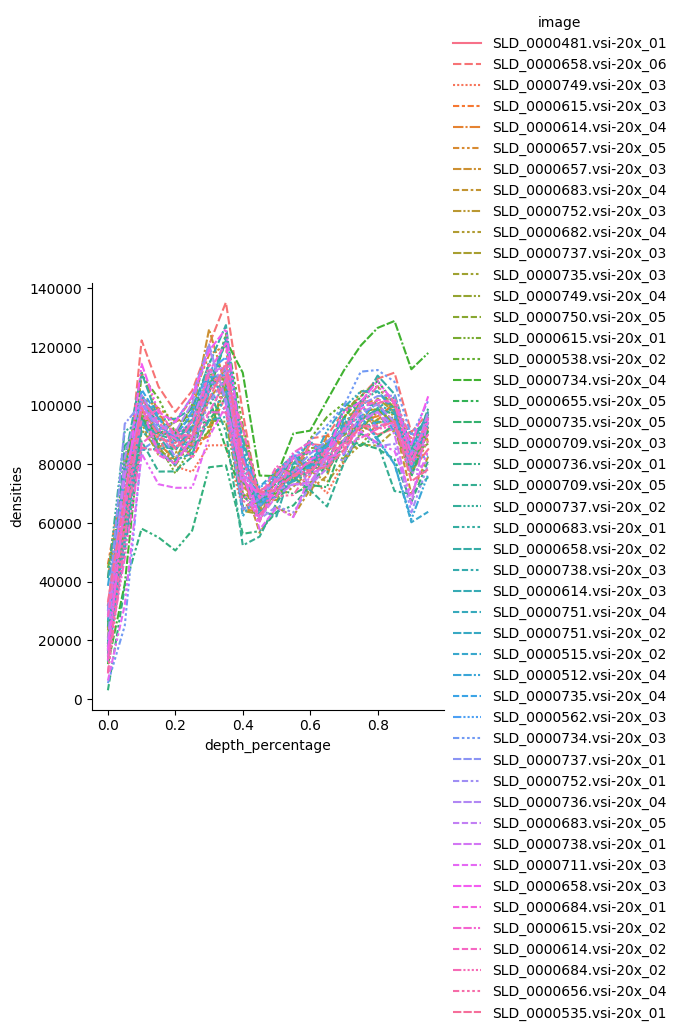

In [262]:
sns.relplot(data=df, x="depth_percentage", y="densities", kind="line", hue="image",  style="image",)

In [248]:
std = df.std(numeric_only=True, axis=1)
depth_percentage = np.unique(df.depth_percentage)
densities = np.array(list(df.groupby('depth_percentage').densities))

plt.plot(depth_percentage, densities, 'o-')
    #ax.fill_between(m.densities - std, m.depth_percentage + std, m.depth_percentage alpha=0.35))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (20, 2) + inhomogeneous part.

In [235]:
df

,image,depth_percentage,densities
0,SLD_0000481.vsi-20x_01,0.00,32015.396035
1,SLD_0000481.vsi-20x_01,0.05,77062.943520
2,SLD_0000481.vsi-20x_01,0.10,94847.702393
3,SLD_0000481.vsi-20x_01,0.15,88783.204387
4,SLD_0000481.vsi-20x_01,0.20,87285.093882
...,...,...,...
15,SLD_0000535.vsi-20x_01,0.75,93395.661252
16,SLD_0000535.vsi-20x_01,0.80,92188.288661
17,SLD_0000535.vsi-20x_01,0.85,94749.410550
18,SLD_0000535.vsi-20x_01,0.90,74217.026760


In [236]:
np.unique(df.depth_percentage)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [239]:
df.densities

0     32015.396035
1     77062.943520
2     94847.702393
3     88783.204387
4     87285.093882
          ...     
15    93395.661252
16    92188.288661
17    94749.410550
18    74217.026760
19    78319.276109
Name: densities, Length: 940, dtype: float64

In [249]:
np.array(df.groupby('depth_percentage').densities)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (20, 2) + inhomogeneous part.

In [252]:
len(list(df.groupby('depth_percentage').densities)[0])

2